In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack, csr_matrix
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
dataFrame = pd.read_csv("../../data/featured/featured.csv")

In [9]:
df = dataFrame
bf = df

In [10]:
seed = 7 
#df = pd.read_csv('feat.csv')
df['text'].fillna(value='Missing', inplace=True)
X = df['text'].values
y = np.log1p(df['retweet_count'].values)
df.head()
len(X)
## process
df = df.replace('?', np.nan)
df = df.dropna()
df.isnull().sum()

user_name            0
text                 0
retweet_count        0
tweet_age            0
sentiment            0
text_length          0
hashtags_count       0
usermention_count    0
urls_count           0
dtype: int64

In [11]:
len(df)

10585

In [16]:
train = df[2000:].copy()
test = df[:2000].copy()

In [18]:
len(train)

8585

In [19]:
test.head()

,user_name,text,retweet_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count
0,katyperry,touched carters story able pls help w chance d...,1381,0,0.50,76,0,0,1
1,ladygaga,rt thwofd cynthia germanotta momgerm explains ...,550,4,0.00,95,1,4,0
2,TheEllenShow,littlebigshots thursday theres better way cele...,347,0,0.25,80,1,0,1
3,TheEllenShow,tuesday mood kaceymusgraves,87,0,0.00,27,0,1,1
4,TheEllenShow,someone watching show gonna way riches,101,0,0.00,38,0,0,1


In [20]:
# Convert a collection of raw documents to a matrix of TF-IDF features with TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5)
X_tfidf = vectorizer.fit_transform(train['text']) 

In [21]:
vectorizer = TfidfVectorizer(min_df=5)
enc = DictVectorizer()
clf = Ridge(alpha=1.0, random_state=241)

In [22]:
df.keys()

Index(['user_name', 'text', 'retweet_count', 'tweet_age', 'sentiment',
       'text_length', 'hashtags_count', 'usermention_count', 'urls_count'],
      dtype='object')

In [23]:
# train data set
X_train = vectorizer.fit_transform(train['text'])
X_train_categ = enc.fit_transform(train[['tweet_age', 'sentiment', 'text_length', 'hashtags_count',
                                        'usermention_count', 'urls_count']].to_dict('records'))
X_train = hstack([X_train, X_train_categ])

# train the model
clf.fit(X_train, train['retweet_count'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=241, solver='auto', tol=0.001)

In [29]:
# test data set
X_test = vectorizer.transform(test['text'])
X_test_categ =  enc.fit_transform(test[['tweet_age', 'sentiment', 'text_length', 'hashtags_count',
                                        'usermention_count', 'urls_count']].to_dict('records'))
X_test = hstack([X_test, X_test_categ])

# prediction ...    
rslt = clf.predict(X_test)

In [56]:
import seaborn as sns
import scipy as sp
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=596)
model_xgb.fit(X_train, X_test)

2000

In [44]:
#Linear regression
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', rslt.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [58]:
len(rslt)
len(test.retweet_count)

2000

In [ ]:
# The coefficients
print('Coefficients: \n', rslt.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test.retweet_count, rslt))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test.retweet_count, rslt))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [66]:
test.retweet_count[1345]

5695

In [65]:
rslt[1345]

256.8941275413022

In [70]:
X_test.shape

(2000, 3303)

TypeError: 'coo_matrix' object is not subscriptable

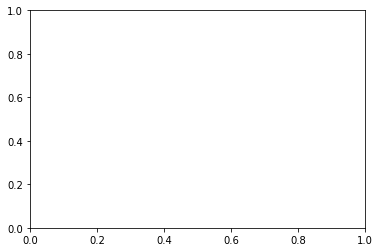

In [60]:
import matplotlib.pyplot as plt
# plot it as in the example at http://scikit-learn.org/
plt.scatter(X_train, X_test,  color='black')
plt.plot(test.retweet_count, rslt, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [36]:
def printreport(exp, pred):
    print(pd.crosstab(exp, pred, rownames=['Actual'], colnames=['Predicted']))
 
    print('\n \n')
    print(classification_report(exp, pred))
 
printreport(test.retweet_count, rslt)

Predicted  -279.339027   -244.693239   -214.852104   -184.359258   \
Actual                                                              
0                     0             0             0             0   
1                     0             0             0             0   
2                     0             0             0             0   
3                     0             0             0             0   
4                     0             0             0             0   
5                     0             0             0             0   
6                     0             0             0             0   
7                     0             0             0             0   
8                     0             1             0             0   
9                     0             0             0             0   
13                    0             0             0             0   
14                    0             0             0             0   
15                    0           

NameError: name 'classification_report' is not defined

In [32]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [27]:
test['pred_retweet'] = clf.predict(X_test)

In [28]:
test.head()

,user_name,text,retweet_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,pred_retweet
0,katyperry,touched carters story able pls help w chance d...,1381,0,0.50,76,0,0,1,166.864923
1,ladygaga,rt thwofd cynthia germanotta momgerm explains ...,550,4,0.00,95,1,4,0,816.276584
2,TheEllenShow,littlebigshots thursday theres better way cele...,347,0,0.25,80,1,0,1,358.629302
3,TheEllenShow,tuesday mood kaceymusgraves,87,0,0.00,27,0,1,1,-23.716053
4,TheEllenShow,someone watching show gonna way riches,101,0,0.00,38,0,0,1,32.926752
